<a href="https://colab.research.google.com/github/sergiogf93/MetNumerics/blob/master/notebooks/01_TLC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Teorema del límit central
====


Per què són tan comuns les distribucions normals? És degut a que la suma de múltiples variables aleatòries es distribueix com una normal si:

1. Les mitjes i les variàncies són finites.
2. Tenim una quantitat suficient (unes 20).


Cada observació en la nostra distribució $x$ segueix:

$$x = \frac{1}{N} \sum_i^N r_i$$

on $r_i$ segueixen la mateixa o diferents distribucions. El TLC  diu que si $N$ és suficientment gran, $p(x) \sim N(\mu,\sigma)$  independentment de les $p(r_i)$.


In [0]:
%matplotlib inline
import random
from scipy import stats as ss
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from math import sqrt, pi
def normal_pdf(x, mu, sigma):
    return 1 / (sigma * sqrt(2 * pi)) * np.exp(-(x - mu)**2 / (2. * sigma ** 2))
mpl.style.use(['seaborn-notebook', 'seaborn-darkgrid'])


Demostració del TLC amb la distribució beta
====

Considerem el TLC amb només 1 distribució. Noteu que el TLC no és aplicable ja que $N=1$. Considerem l'única contribució una distribució beta:

$$
p(r_0) = \frac{1}{Z}\, r_0^{\alpha - 1} \,(1 - r_0)^{\beta - 1}
$$

On $Z$, $\alpha$, and $\beta$ són paràmetres de la distribució beta. En aquest cas l'espai mostral és $[0,1]$. 

Considerem la nostra equació mitjana:
$$
x = \frac{1}{N} \sum_i^N r_i
$$


Tenim $N = 1$. Quin aspecte tindrà $p(x)$? Serà normal?

In [0]:
data = np.empty(1000)
#for 1000 times (enough to get a nice plot)
for i in range(1000):
    data[i] = ss.beta.rvs(0.5, 0.5) 


#histogram the samples
plt.hist(data, bins=25)
plt.title('Average with N = 1')

#Show the plot. 
plt.show() 

$N=1$ significa que per cada observació de $x$, tenim 1 contribució $r_i$ a la mitjana. En aquest cas, $x$ = $r_i$, però què passarà si $N=2$ on ambdós $r_1$ i $r_2$ segueixen la **mateixa** distribució beta?


In [0]:
#Escriu codi similar a l'anterior per generar 1000 valors r_1, r_2 que segueixin la distribució beta.

#Fes un histograma de la variable x = (r_1 + r_2) / 2

In [0]:
#@title
#Sample 2 beta numbers 1000 times
N = 2
data = np.empty(1000)
for i in range(1000):
    #Here's where we use the average equation
    r_1 = ss.beta.rvs(0.5, 0.5)
    r_2 = ss.beta.rvs(0.5, 0.5)
    data[i] = (r_1 + r_2) / 2

#histogram the samples with 25 bins
plt.hist(data, bins=25)
plt.title('Average with N = 2')
plt.show() 

Caram! Amb $N=2$ ja es comença a veure una normal. 

Probem amb $N=25$?

In [0]:
#Fes el mateix ara amb 25 r_i que segueixen una distribució beta.

In [0]:
#@title
#Sample 25 beta numbers 1000 times
N = 25
data = np.empty(1000)
for i in range(1000):
    #Here's where we use the average equation
    #we'll do this more automatically using np.mean
    rs = ss.beta.rvs(0.5, 0.5, size=N)
    data[i] = np.mean(rs)

#histogram the samples with 25 bins
plt.hist(data, bins=25)
plt.title('Average with N = 25')
plt.show() 

Ara ja es pot veure la distribució normal.

TLC amb múltiples binomials
====

Hem aconseguit moure'ns d'un espai mostral $[0,1]$  a un que sembla $(-\infty, \infty)$. El TLC també ha aconseguit converir la distribució beta, que té pics als extrems, en una normal. Increíble!

Intentem fer encara més. Considerem mostres que segueixen un conjung de distribucions binomials i premen la seva mitjana. En aquest cas tindrem múltiples distribucions a sobre discretes!


Recordatori. Estem calculant:
$$
x = \frac{1}{N} \sum_i^N r_i
$$

on $r_i \sim P_i(r_i)$, un conjunt de  distribucions binomial **diferents**.

Com abans, comencem pel cas $N=1$

In [0]:
N = 1

#Create an array of p parameters to use for our distributions
some_ps = np.random.random(N) 

#Create our M (trial number) parameters for binomial between 1 and 15.
#We don't go past 15 because it's time consuming to compute the numbers
some_Ms = np.random.randint(1, 15, N)

#create a place to store our data
data = []
for i in range(10000):
    point = 0
    for j in range(N):
         #We use the jth distribution parameters to sample
        point += ss.binom.rvs(some_Ms[j], some_ps[j])
    #We cast to float, since everything is done until now in integers
    data.append(float(point) / N) 

In [0]:
plt.hist(data, 25)
plt.title('CLT with 1 Binomial Dist')
plt.show()

Com és esperat, observem una distribució binomial.

Considerem el cas per $N=5$


In [0]:
#Fes servir el codi anterior per fer 5 binomials i construeix la variable x = mitjana de les binomials.

In [0]:
#@title
N = 5

#Create an array of p parameters to use for our distributions
some_ps = np.random.random(N) 

#Create our M (trial number) parameters for binomial between 1 and 15.
#We don't go past 15 because it's time consuming to compute the numbers
some_Ms = np.random.randint(1, 15, N)

#create a place to store our data
data = []
for i in range(10000):
    point = 0
    for j in range(N):
         #We use the jth distribution parameters to sample
        point += ss.binom.rvs(some_Ms[j], some_ps[j])
    #We cast to float, since everything is done until now in integers
    data.append(float(point) / N) 
    
plt.hist(data, 25)
plt.title('CLT with 5 Binomial Dist')
plt.show()

In [0]:
#@title
N = 25

#Create an array of p parameters to use for our distributions
some_ps = np.random.random(N) 

#Create our M (trial number) parameters for binomial between 1 and 15.
#We don't go past 15 because it's time consuming to compute the numbers
some_Ms = np.random.randint(1, 15, N)

#create a place to store our data
data = []
for i in range(10000):
    point = 0
    for j in range(N):
         #We use the jth distribution parameters to sample
        point += ss.binom.rvs(some_Ms[j], some_ps[j])
    #We cast to float, since everything is done until now in integers
    data.append(float(point) / N) 

In [0]:
plt.hist(data, 25, density = True)
mu = np.mean(data)
sigma = np.std(data)
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
plt.plot(x,normal_pdf(x, mu, sigma), color = 'r')
plt.title('CLT with 25 Binomial Dist')
plt.show()

Tot i que les distribucions són diferents i *discretes*, la seva mitjana es transforma en una distribució normal!


Qüestionari
====
Indica si el TLC és aplicable en els següents casos:
* Mesureu les precipitacions a 25 països i fas la mitjana.
* Calculeu la mitjana de precipitació en una ciutat particular pels 25 anys anteriors.
* Mesureu la temperatura a partir de 20 termòmetres distribuïts a un reactor i feu la mitjana.
* Mesureu les masses de 25 substàncies químiques.
* Mengeu 25 caramels aleatòris cada dia i sumeu les calories.
* Una mesura que té 20 fonts d'error diferent. 
* Una mesura no segueix una distribució normal. Fas la mesura 22 vegades i prens la mitjana.

Si, si, si, no (no es fa mitjana), si, si, si

Descobrir la verdadera mitjana
====

Una aplicació important del TCL és descriure la distribució de les mijanes de mostres. Volem comparar mijanes mostrals amb les mitjanes de les poblacions, **$\mu$**. 

La paraula "població" vol dir l'estadística d'una població sencera a partir d'una petita mostra. Podem pensar-hi com la pdf desconeguda que descriu les mostres que observem. Si calculem la mitjana a partir d'una mostra d'una població, vé descrita per:

$$ p(\bar{x})$$

on $$\bar{x} = \frac{1}{N} \sum_i^N x_i$$

Nota que $p(\bar{x})$ és normal degut al TLC!

Aquesta és una manera molt bonica de combinar l'estadística amb la teoria de probabilitat! Estem fent mitjanes mostrals d'una certa variable aleatòria $x_i$, que és un problema estadístic i estem describint quin aspecte tindrà el resultat a partir de la teoria de probabilitat.


Vegem com $p(\bar{x})$ es distribueix. És una normal? Com canvia la desviació estàndard/variança? És funció del tamany de la mostra?

En comptes de derivar l'equació corresponent, escrivim un *programa* que calcula la mitjana.

Aquest codi calcula $\bar{x}$ múltiples vefades donat que coneixem la població real $\mu$. Generarem moltes mostres de mida $N$ i calcularem $\bar{x}$. Després farem l'histograma de totes les $\bar{x}$.

In [0]:
def hist_means(N, mean=2, std_dev=3, bins=25, samples=10000):
    data = [] #we store results here
    #We're going through the process of computing a sample mean/var this many times
    for i in range(samples):
        #create N random samples.
        random_samples = ss.norm.rvs(loc=mean, scale=std_dev, size=N)
        #take their mean
        sample_mean = np.mean(random_samples)
        data.append(sample_mean)
    #After generating the data, we histogram with the given bin number
    hist, bins = np.histogram(data, bins, normed=True)
    #We compute the centers of the bins by averaging the intervals
    #that make up the bins
    bin_centers = (bins[1:] + bins[:-1]) / 2.
    return hist, bin_centers

Adona't que $\mu = 2$

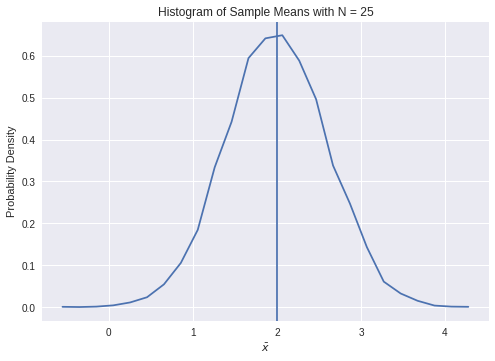

In [54]:
hist, bin_centers = hist_means(N=25)
plt.plot(bin_centers, hist)
plt.title('Histogram of Sample Means with N = 25')
plt.xlabel(r'$\bar{x}$')
plt.ylabel('Probability Density')
plt.axvline(x=2)
plt.show()

Com esperàvem, la distribució és normal amb $N=25$ mostres. A més a més, beiem que la distribució està centrada a $\mu$! Així doncs, la nostra deducció per la distribució de $\bar{x}$ és:

**Suposició 1**:
$$
p(\bar{x}) = \mathcal{N}(\mu, ?)
$$

Per trobar la desviació estàndard de la mitjana mostral, provem a canviar la desviació estàndard de la *població*


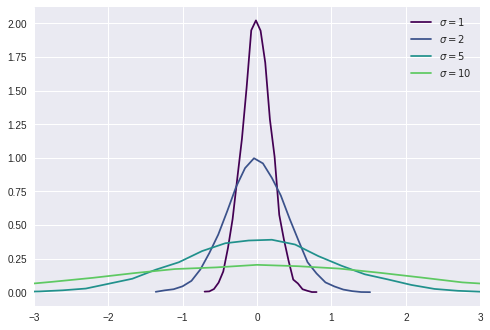

In [55]:
#These are the stddevs
sigmas = [1, 2, 5, 10]
#This creates a color function, using the summer palette
color_map = plt.get_cmap("viridis")
#loop over sigmas
for i in range(len(sigmas)):
    #call our function above
    hist, bin_centers = hist_means(25, mean=0, std_dev=sigmas[i])
    #plot the results, label it, and use our color function to get a color
    plt.plot(bin_centers, hist, color=color_map(i / len(sigmas)), label="$\\sigma={}$".format(sigmas[i]))
#add a plotting legend
plt.legend()
#set the x-axis limit
plt.xlim(-3, 3)
plt.show()

Sembla que com més gran él la desviació estàndard de la *població*, més incertesa tenim en la nostra estimació de $\mu$ que és $\bar{x}$. Vegem si podem descriure analíticament aquesta relació. Suposem que:

**Suposició 2:**
$$
p(\bar{x}) \propto \mathcal{N}(\mu, \sigma)
$$

Estem suposant que el TLC ens dóna una distribució normal centrada a $\mu$ amb la desviació estándard igual a la de la població. Podem comprovar-ho si calculem:

$$
Z = \frac{x - \mu}{\sigma}
$$

In [0]:
def hist_means_scaled(N, mean=2, std_dev=3, bins=25, samples=10000):
    data = []
    for i in range(samples):
        random_samples = ss.norm.rvs(loc=mean, scale=std_dev, size=N)
        sample_mean = np.mean(random_samples)
        #The change!
        data.append((sample_mean - mean) / std_dev)
    hist, bins = np.histogram(data, bins, normed=True)
    bin_centers = (bins[1:] + bins[:-1]) / 2.
    return hist, bin_centers

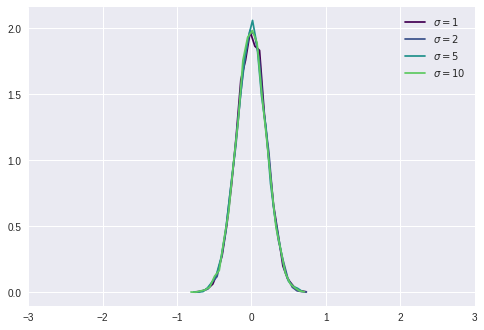

In [57]:
sigmas = [1, 2, 5, 10]
color_map = plt.get_cmap("viridis")
for i in range(len(sigmas)):
    hist, bin_centers = hist_means_scaled(25, std_dev=sigmas[i])
    plt.plot(bin_centers, hist, color=color_map(i / len(sigmas)), label="$\\sigma={}$".format(sigmas[i]))
plt.legend()
plt.xlim(-3, 3)
plt.show()

Perfecte! Ara sabem com descriure $p(\bar{x})$. Tot i això, encara no hem considerat l'efecte del mombre de mostres! Com afecta $N$?


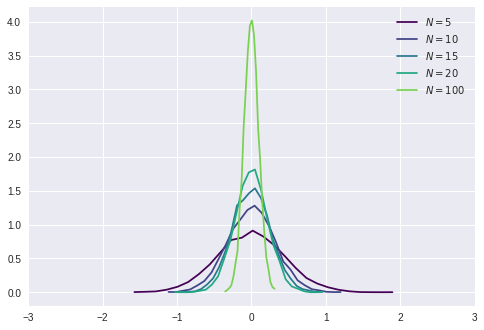

In [49]:
#These are the sample sizes we'll try out
Ns = [5, 10, 15, 20, 100]
color_map = plt.get_cmap("viridis")
for i in range(len(Ns)):
    hist, bin_centers = hist_means_scaled(Ns[i])
    plt.plot(bin_centers, hist, color=color_map(i / len(Ns)), label="$N={}$".format(Ns[i]))
plt.legend()
plt.xlim(-3, 3)
plt.show()

Sembla que hi ha un efecte d'escala. Sembla que és similar a:

$$
p(\bar{x}) = \mathcal{N}\left(\mu, \frac{\sigma}{\sqrt{N}}\right)
$$

Aquesta és, de fet, la resposta correcte.

In [0]:
# Comprova que p(bar(x)) = N(mu,sigma/sqrt(N))

In [0]:
#@title
def hist_means_scaled_version2(N, mean=2, std_dev=3, bins=25, samples=10000):
    data = []
    for i in range(samples):
        random_samples = ss.norm.rvs(loc=mean, scale=std_dev, size=N)
        sample_mean = np.mean(random_samples)
        #The change!
        data.append(sqrt(N) * (sample_mean - mean) / std_dev)
    hist, bins = np.histogram(data, bins, normed=True)
    bin_centers = (bins[1:] + bins[:-1]) / 2.
    return hist, bin_centers

In [0]:
#@title
Ns = [5, 10, 15, 20, 100]
color_map = plt.get_cmap("viridis")
for i in range(len(Ns)):
    hist, bin_centers = hist_means_scaled_version2(Ns[i])
    plt.plot(bin_centers, hist, color=color_map(i / len(Ns)), label="$N={}$".format(Ns[i]))
plt.legend()
plt.xlim(-3, 3)
plt.show()

Típicament, volem calcular la incertesa en la mitjana mostral. Això és, $p(\bar{x} - \mu)$. Pel que hem deduït abans:

$$
p(\bar{x} - \mu) = \mathcal{N}\left(0, \frac{\sigma}{\sqrt{N}}\right)
$$

Una característica interessant és que podem veure tant $\bar{x}$ com $\mu$ com la variable. Si veiem $\mu$ com la variable, estem descrivint on pensem que la mitjana de la població pot estar. D'altra banda, si veiem $\bar{x}$ com la variable, estem descrivint on creiem que es trobarà la nostra mitjana mostral una vegada prenem la mostra.
an will be if we take a sample.

L'error en la mitjana de la població és una distribució normal ${\cal N} (0, \sigma / \sqrt{N})$ on $\sigma$ és la verdadera $\sigma$ de la població. Normalment anomenem la desviació estàndard d'aquesta distribució l'"error estàndard":

$$\sigma_e = \frac{\sigma}{\sqrt{N}} $$

Analytical Equation for Error in Population Mean
----

We saw above how things look when we histogram and sample. That gave us an empirical look at how the sample mean varies relative to the population mean. Let's now see our analytical equation above compare with the histograms.

As stated above, using our sample mean to estimate our population mean leads to a probability distribution:

$$
p(\bar{x} - \mu) = \mathcal{N}(0, \sigma / \sqrt{N}) = \frac{1}{2\sqrt{\frac{\sigma^2 \pi} {N 2}}} e^{-\frac{\left(\bar{x} - \mu\right)^2}{2\sigma^2 / N}}
$$

**where now we'll take the independent variable as the population mean ($\mu$)**

Let's compare our empirical estimates above to this:

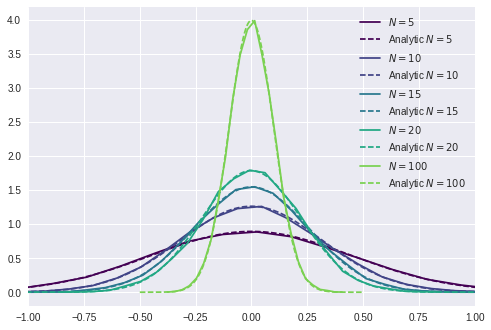

In [0]:
pop_std = 1

#this is the code from above
for i in range(len(Ns)):
    Ni = Ns[i]
    hist, bin_centers = hist_means_scaled(Ni, std_dev=pop_std, samples=25000)    
    plt.plot(bin_centers, hist, color=color_map(i / len(Ns)), label="$N={}$".format(Ni))
    #plot analytic
    #make some points that span the high-probability density values
    standard_error = pop_std / np.sqrt(Ni)
    x = np.linspace(- 5*standard_error, 5 * standard_error, 500)
    plt.plot(x, ss.norm.pdf(x, scale=standard_error), color=color_map(i / len(Ns)), label="Analytic $N={}$".format(Ni), linestyle='--')
plt.legend()
plt.xlim(-1, 1)
plt.show()

So it is true that $p(\bar{x} - \mu)$ follows a normal distribution when we know the population standard deviation!

Error en la mitjana de la població - Probleme exemple
====

Coneixem $\sigma = 0.2$ per un equilibri químic. Per calibrar les micro-pipetes hem de mesurar la massa d'un volum d'aigua. Mesurem 1 ml d'aigua 20 vegades i obtenim que la mitjana mostral $\bar{x} = 1.001$g. Quina és la probabilitat que la mitjana de la població $\mu$ es trobi a 0.001 g de la mitjana mostral?  


Això és una distribució normal ${\cal N} (0, \sqrt{0.2^2 / 20})$ i volem l'interval entre -0.001 i 0.001.

$\DeclareMathOperator{\erf}{erf}$
$\DeclareMathOperator{\cdf}{CDF}$
$$\int_{Z_1}^{Z_2} {\cal N}(0, 1) = \cdf(Z_2) - \cdf(Z_1)$$

In [0]:
from math import sqrt

sigma = sqrt(0.2**2 / 20)
Z1 = -0.001 / sigma
Z2 = -Z1

print( ss.norm.cdf(Z2) - ss.norm.cdf(Z1))

Desviació estàndard de la població desconeguda
====

Què passa si no tenim la variança o la desviació estàndard de la població i n'estem fent una estimació al mateix temps? Anem a veure si encara és normal.

**A partir d'ara inclourem el terme $1/N$ que hem observat prèviament per tal de treure la influència de la mida de la mostra**

In [0]:
def make_hist(N, mean=12, std_dev=3, bins=25, samples=100000):
    data = []
    for i in range(samples):
        random_samples = np.random.normal(mean, std_dev, N) 
        sample_mean = np.mean(random_samples)
        sample_var = np.var(random_samples) * (N / (N - 1.0))
        #We add the sqrt(N) dependence below
        data.append((sample_mean - mean) / (sqrt(sample_var) / sqrt(N)))
    hist, bins = np.histogram(data, bins = np.linspace(-3, 3, bins))
    bin_centers = (bins[1:] + bins[:-1]) / 2.
    #This line we changed so that we're working in probability, not counts.
    return hist / samples, bin_centers

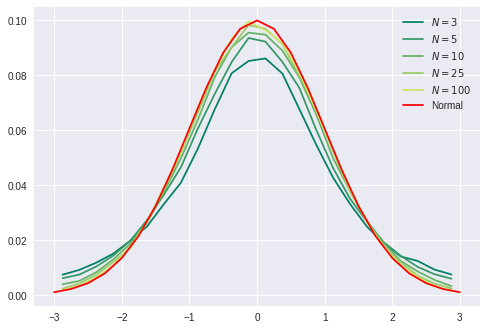

In [62]:
Ns = [3, 5, 10, 25, 100]
color_map = plt.get_cmap('summer')
for i in range(len(Ns)):
    Ni = Ns[i]
    hist, bin_centers = make_hist(Ni, std_dev=1)
    plt.plot(bin_centers, hist, color=color_map(i / len(Ns)), label='$N={}$'.format(Ni))

from math import erf
x = np.linspace(-3,3,25)
#The extra factor is to scale the pdf to match our data
plt.plot(x,normal_pdf(x, 0, 1) / (erf(3 / sqrt(2)) - \
                                  erf(-3 / sqrt(2))) / 2,
         label="Normal", color='red')
    
plt.legend()
plt.show()

Les desviacions estàndard i mitjanes desconegudes compleixen el TCL?
====

**No fins ~25 mostres**. Si la mida de la mostra és més petita, assumir una distribució normal dóna intervals conservadors. Noteu que el TCL es pot aplicar quan coneixem la $\sigma$ de la població. No funciona si la mida de la mostra és petita ni quan estem fent estimacions de la mitjana i de la desviació estàndard de la mostra.


Distribució t-Student
====

La distribució que descriu la distància entre les mitjanes mostral i poblacional quan no coneixem la desviació estàndard és la t-Student.



$p(\mu - \bar{x})$  segueix una t-Student amb  $\sigma_e = \sigma_x / \sqrt{N}$. 


$$T(0, \sigma_x / \sqrt{N}, N - 1)$$

Noteu que hi ha un paràmetre més, $N - 1$. Això són els graus de llibertat. 

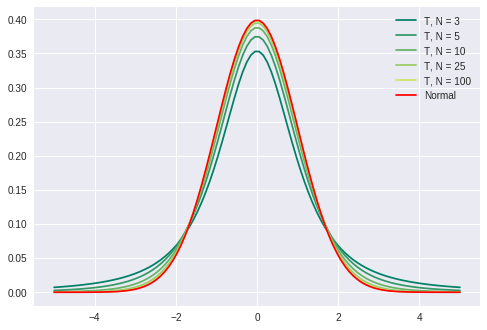

In [63]:
import scipy.stats

#make some points
x = np.linspace(-5,5, 100)

#Compute pdf on t and normal
yn = scipy.stats.norm.pdf(x)
for i,Ni in enumerate(Ns):
    y = scipy.stats.t.pdf(x, df=Ni-1)
    plt.plot(x,y,color=color_map(i / len(Ns)),label="T, N = {}".format(Ni))    
plt.plot(x,yn, color='r',label="Normal")
plt.legend()

plt.show()

Resum
====

Estimar la mitjana de la població a partir de la mitjana mostral és una distribució aleatòria. La mitjana mostral $\bar{x}$, és un estadístic i $\mu$ és una variable aleatòria que segueix o bé una normal, o bé una t-Student.


Quan coneixem la desviació estándard de la població, $p(\mu) = {\mathcal N}(\bar{x}, \sigma / \sqrt{N})$ on $N$ és el nombre de mostres utilitzades per calcular la mitjana mostral i $\sigma$ és la desviació estándard de la població.

Quan no coneixem la desviació estándard de la població, hi ha un error adicional degut a que estem estimant la desviació estándard de la població a partir de la desviació estándard de la mostra. 

Si $\sigma_x$ és la desviació estándard de la mostra: $p(\mu) = T(\bar{x}, \sigma_x / \sqrt{N}, N-1)$. Noteu que la  $t$-Student depèn del nombre de mostres. El tercer terme, N-1, són els graus de llibertat.

Ara que coneixem la distribució de la mitjana de la mostra, podem calcular intervals de confiança o fer gràfiques de les densitats de probabilitat.
